In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, PIL
from glob import glob
import tensorflow as tf
from io import StringIO 
from PIL import Image
import pydot
import imageio as iio
#import cv2

from __future__ import print_function
import pandas as pd
import shutil
import os
import sys

#import seaborn as sns
from sklearn import model_selection


import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import  img_to_array
from tensorflow.keras.preprocessing.image import array_to_img


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
""" Sequential Model Architecture """
Sequential = tf.keras.models.Sequential

""" Data Preprocessing Functions """
Resizing = tf.keras.layers.experimental.preprocessing.Resizing
Rescaling = tf.keras.layers.experimental.preprocessing.Rescaling

""" Data Augmentation Functions """
RandomFlip = tf.keras.layers.experimental.preprocessing.RandomFlip
RandomRotation = tf.keras.layers.experimental.preprocessing.RandomRotation
RandomZoom = tf.keras.layers.experimental.preprocessing.RandomZoom

""" Artificial Neural Network Layer Inventory """
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout

""" Convolutional Neural Network Layer Inventory """
Conv2D = tf.keras.layers.Conv2D
MaxPool2D = tf.keras.layers.MaxPool2D
Flatten = tf.keras.layers.Flatten

""" Residual Network Layer Inventory """
ResNet50 = tf.keras.applications.resnet50.ResNet50

""" Function to Load Images from Target Folder """
get_image_data = tf.keras.utils.image_dataset_from_directory

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

img_width, img_height = 100, 100

In [4]:
if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)

In [5]:
train_data_dir ='Train1'
validation_data_dir ='Dev'
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
batch_size = 25

In [6]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # warning disabling

training_dataset = get_image_data(
    directory=train_data_dir,
    seed=42,
    image_size=(img_width, img_height),
    batch_size=batch_size
)

validation_dataset = get_image_data(
    directory=validation_data_dir,
    seed=42,
    image_size=(img_width, img_height),
    batch_size=batch_size
)
class_names=training_dataset.class_names
print(class_names)

Found 1058 files belonging to 2 classes.
Found 855 files belonging to 2 classes.
['Attack', 'Real']


In [8]:
resizing_layer = layers.experimental.preprocessing.Resizing(img_width, img_height)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, 
                                                                  input_shape=(img_width, img_height, 
                                                                               3))

def configure_performant_datasets(dataset, shuffling=None):
    """ Custom function to prefetch and cache stored elements 
    of retrieved image data to boost latency and performance 
    at the cost of higher memory usage. """    
    AUTOTUNE = tf.data.AUTOTUNE
    # Cache and prefetch elements of input data for boosted performance
    if not shuffling:
        return dataset.cache().prefetch(buffer_size=AUTOTUNE)
    else:
        return dataset.cache().shuffle(shuffling).prefetch(buffer_size=AUTOTUNE)
    
    
    
training_dataset = configure_performant_datasets(training_dataset, 
                                                 shuffling=1000)
validation_dataset = configure_performant_datasets(validation_dataset)


In [20]:
def plot_training_results(history):
    """
    Visualize results of the model training using `matplotlib`.

    The visualization will include charts for accuracy and loss, 
    on the training and as well as validation data sets.

    INPUTS:
        history(tf.keras.callbacks.History): 
            Contains data on how the model metrics changed 
            over the course of training.
    
    OUTPUTS: 
        None.
    """
    accuracy = history.history['accuracy']
    accuracy
    validation_accuracy = history.history['val_accuracy']
    validation_accuracy

    loss = history.history['loss']
    loss
    validation_loss = history.history['val_loss']
    validation_loss

    epochs_range = range(epochs)
    epochs_range

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training Accuracy')
    plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, validation_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 99, 99, 16)        208       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 48, 48, 16)        1040      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 23, 23, 16)        1040      
                                                                 
 flatten_13 (Flatten)        (None, 8464)            

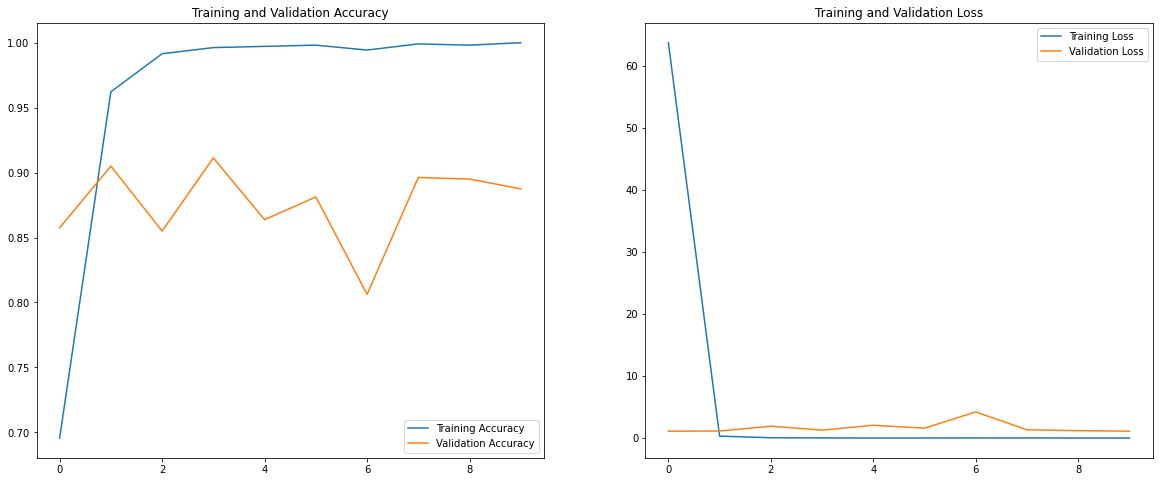

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 47, 47, 16)        2320      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 21, 21, 16)        2320      
                                                                 
 flatten_14 (Flatten)        (None, 7056)            

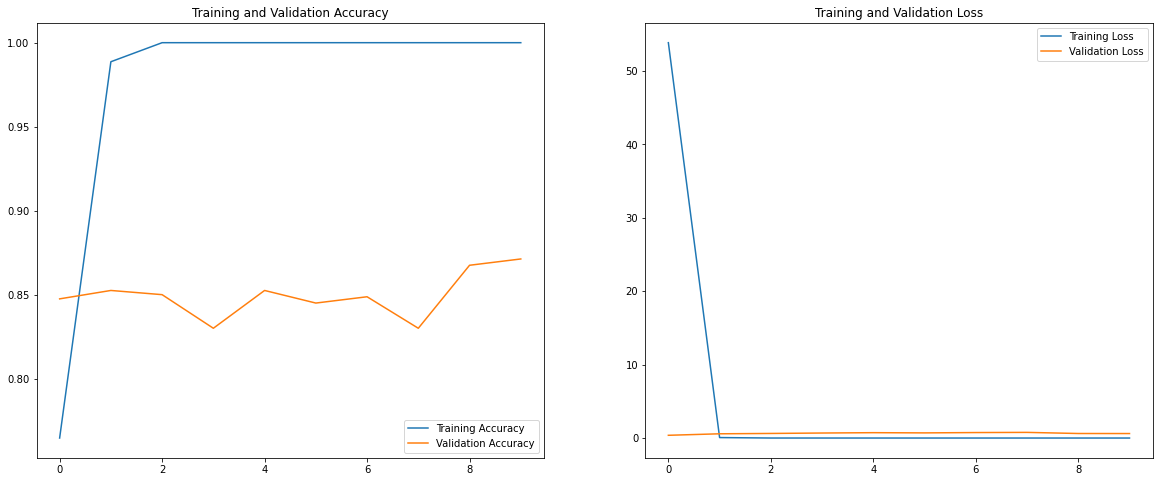

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 99, 99, 32)        416       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 48, 48, 32)        4128      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 23, 23, 32)        4128      
                                                                 
 flatten_15 (Flatten)        (None, 16928)           

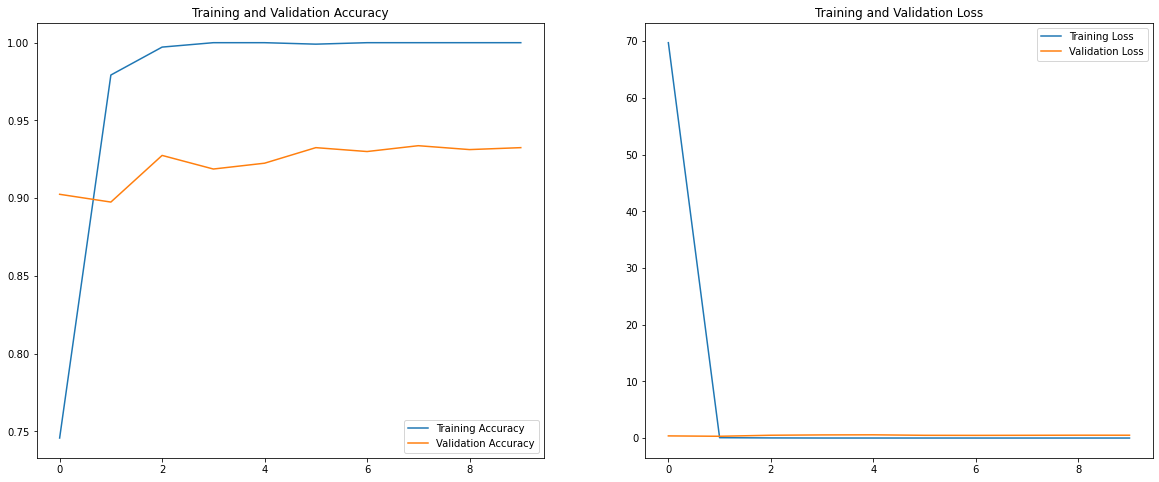

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 21, 21, 32)        9248      
                                                                 
 flatten_16 (Flatten)        (None, 14112)           

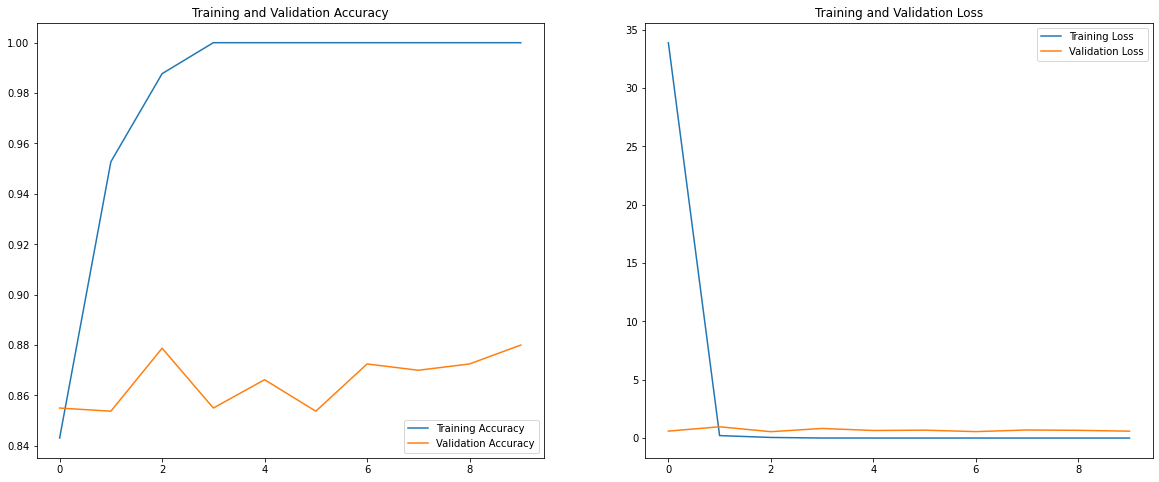

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 99, 99, 64)        832       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 48, 48, 64)        16448     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 23, 23, 64)        16448     
                                                                 
 flatten_17 (Flatten)        (None, 33856)           

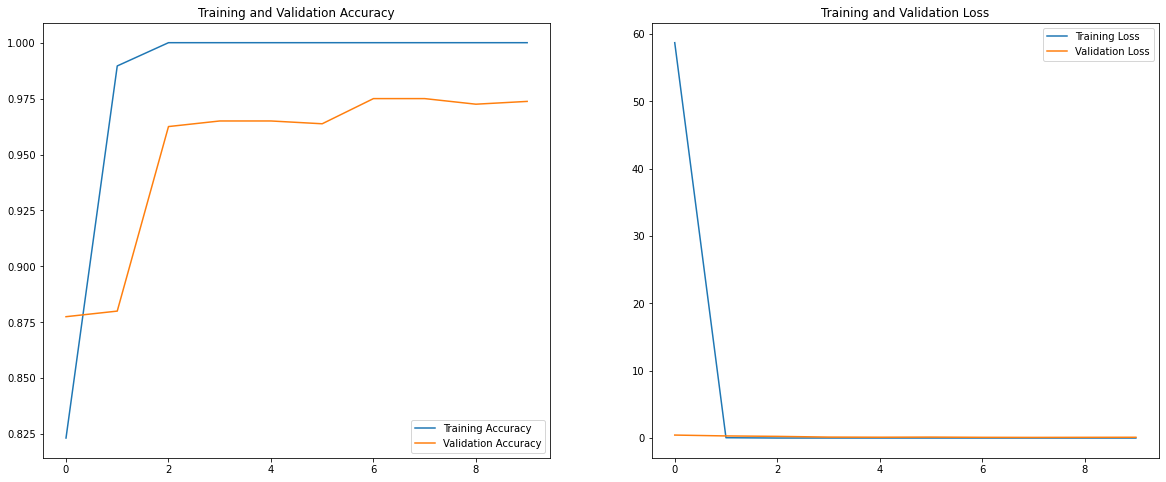

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 flatten_18 (Flatten)        (None, 28224)           

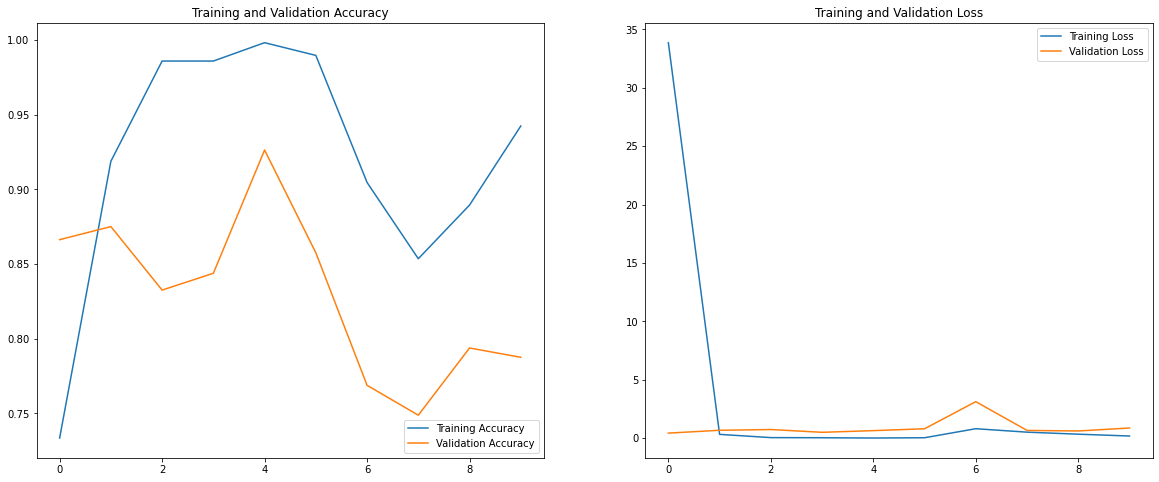

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 99, 99, 128)       1664      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 49, 49, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 48, 48, 128)       65664     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 24, 24, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 23, 23, 128)       65664     
                                                                 
 flatten_19 (Flatten)        (None, 67712)           

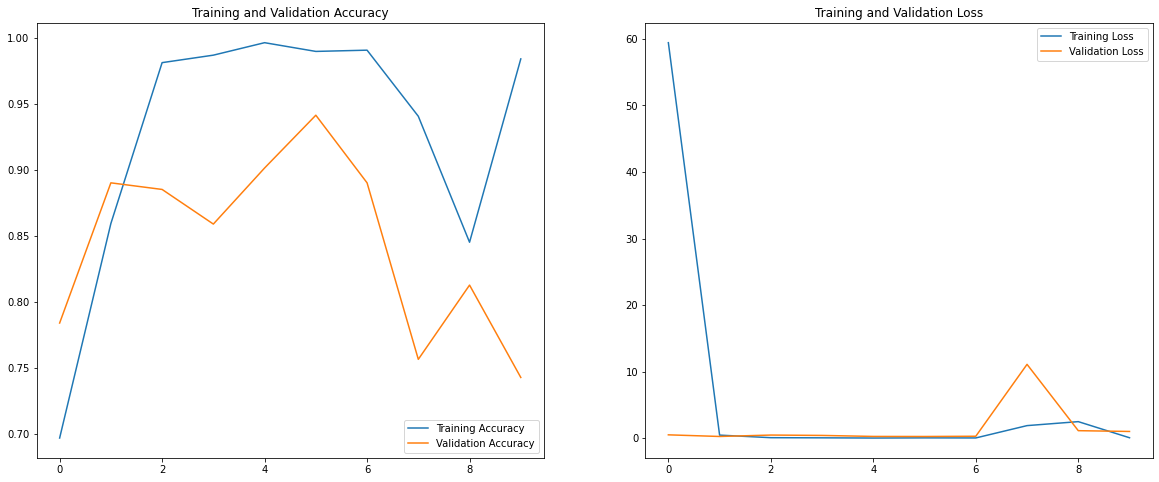

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 49, 49, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 47, 47, 128)       147584    
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 23, 23, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 21, 21, 128)       147584    
                                                                 
 flatten_20 (Flatten)        (None, 56448)           

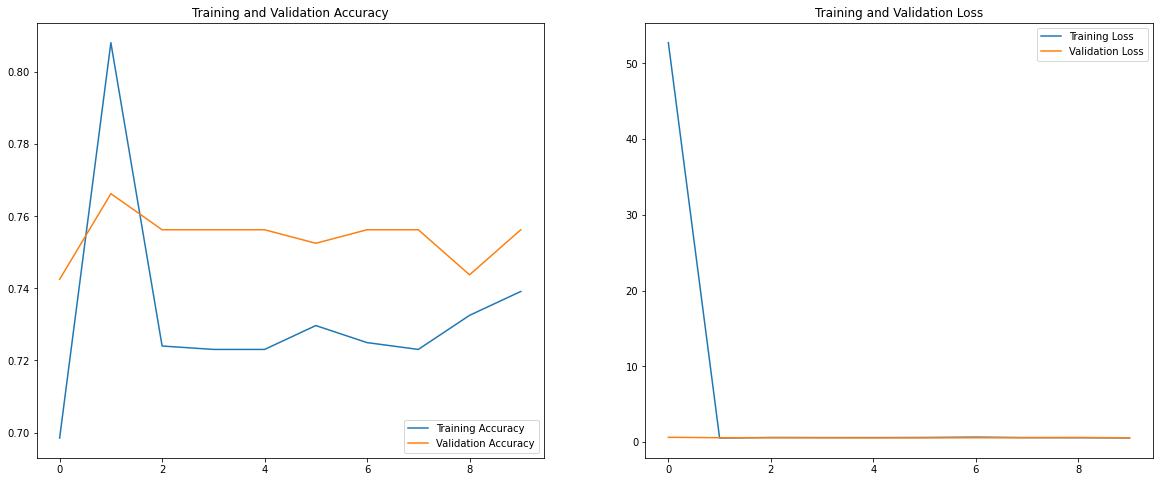

In [24]:
from tensorflow.keras import optimizers
filters = [[16,2],[16,3],[32,2],[32,3],[64,2],[64,3],[128,2],[128,3]]
for x,y in filters:
    model = Sequential()
    model.add(layers.Conv2D(x, (y, y), activation='relu', input_shape=(img_width,img_height,3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(x, (y, y), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(x, (y, y), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation = 'softmax'))
    model.summary()
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
			optimizer='Adam',
			metrics=['accuracy'])
    epochs = 10
    history = model.fit(training_dataset, validation_data = validation_dataset, epochs=epochs, validation_steps = 800 // batch_size)
    plot_training_results(history)